In [3]:
from FLASH_OSIRIS_define import *
import sys
sys.path.append('../src')

In [4]:
interface = FLASH_OSIRIS(
    FLASH_data="/mnt/cellar/shared/simulations/FLASH_MagShockZ3D-Trantham_2024-06/MAGON/MagShockZ_hdf5_chk_0005",
    inputfile_name="magshockz-v3.3",
    osiris_dims=2,
    reference_density=5e18,
    ppc=32,
    xmax = [-2000,2000],
    ymax = [-100,100],
    rqm_factor=10,
    dx_ndebye=7.14,
    algorithm="cuda",
)
interface.save_instance()
interface.write_everything()

2025-11-11 13:53:17,192 - FLASH_OSIRIS_define - INFO - Loading FLASH data from /mnt/cellar/shared/simulations/FLASH_MagShockZ3D-Trantham_2024-06/MAGON/MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2025-11-11 13:53:18,018 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2025-11-11 13:53:18,018 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2025-11-11 13:53:18,019 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2025-11-11 13:53:18,019 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2025-11-11 13:53:18,019 Parameters: cosmological_simulation   = 0
2025-11-11 13:53:19,219 - FLASH_OSIRIS_define - INFO - ==================================================
2025-11-11 13:53:19,219 - FLASH_OSIRIS_define - INFO - INITIALIZING FLASH-OSIRIS INTERFACE
2025-11-11 13:53:19,219 - FLASH_OSIRIS_define - INFO - FLASH data: /mnt/cellar/shared/simulations/FLASH_MagShockZ3D-Trantham_2024-06/MAGON/MagShock

KeyError: 'background'

In [5]:
interface.show_lineout_in_plane('edens')
lineouts = interface.plot_1D_lineout(['edens', 'channeldens', 'sheathedens', 'backgrounddens', 'sidens'])
mag_fields = interface.plot_1D_lineout(['Bx_int', 'By_int', 'Bz_int'])
ufl = interface.plot_1D_lineout(['v_ey','v_iy'])

FileNotFoundError: [Errno 2] No such file or directory: '/home/dschneidinger/MagShockZ/input_files/magshockz-v2.0.2d/interp/edens.npy'

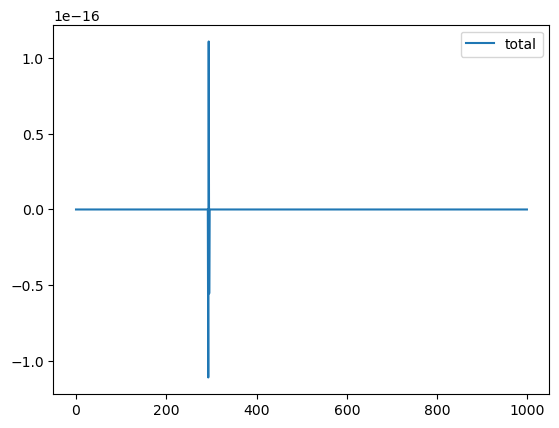

In [15]:
import matplotlib.pyplot as plt
total = lineouts['sidens']+lineouts['backgrounddens']+lineouts['sheathedens']+lineouts['channeldens']
plt.plot(total - lineouts['edens'],label='total')
# plt.plot(lineouts['channeldens']/np.max(lineouts['channeldens']),label='channeldens')
# plt.plot(ufl['v_iy']/np.max(ufl['v_iy']),label='v_iy')
# plt.plot(ufl['v_ey']/np.max(ufl['v_ey']),label='v_ey')
# plt.plot(mag_fields['Bx_int']/np.max(mag_fields['Bx_int']),label='Bx_int')

plt.legend()

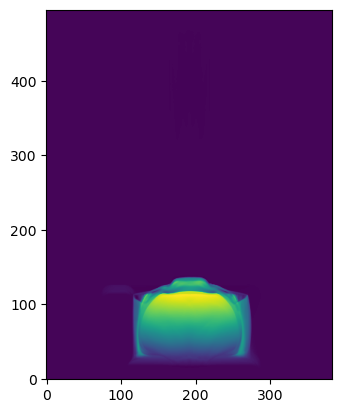

In [5]:
import yt

plt.imshow(interface.all_data['v_iy'][:,:,interface.all_data['v_ix'].shape[2]//2].T, origin='lower')

In [23]:
print(interface)

FLASH-OSIRIS INTERFACE
FLASH data: /home/dschneidinger/shared/data/VAC_DEREK3D_20um/MagShockZ_hdf5_chk_0006
Input file name: magshockz-v3.2.1d-45degrees.1d
Reference density: 5e+18 cm^-3
species_rqms: {'channel': 3810, 'sheathe': 6802, 'background': 7257, 'si': 3899}
all rqms will be divided by 10
External background magnetic field: 75000 Gauss
OSIRIS dimensions: 1
Particles per cell: 100
Start point: [0, 540] [c/wpe]Angle: 0.7853981633974483 (only used in 1D)Xmax: 4700 (only used in 1D)Output directory: /home/dschneidinger/MagShockZ/input_files/magshockz-v3.2.1d-45degrees.1d
